In [4]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
import coffea.util as util

sys.path.append("../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisSubroutines as routines
import numba as nb
from matplotlib.colors import Normalize, LogNorm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
#fin = "root://cmseos.fnal.gov//store/group/lpcmetx/iDMe//Samples/Ntuples/signal_v8_miniAOD/2018/Mchi-33p0_dMchi-6p0/ctau-1/ntuples_Mchi-33p0_dMchi-6p0_ctau-1_00.root"
fin = "/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMe/AODSkimmer/output_EBRejection.root"
#fin = "root://cmseos.fnal.gov//store/group/lpcmetx/iDMe//skimmed_ntuples/signal/signal_v8_miniAOD_2018_aEM_rdfSkim_MET200/output_sig_Mchi-105p0_dMchi-10p0_ct-10/ntuples_sig_Mchi-105.0_dMchi-10.0_ct-10_0.root"
t = loadSchema(fin)

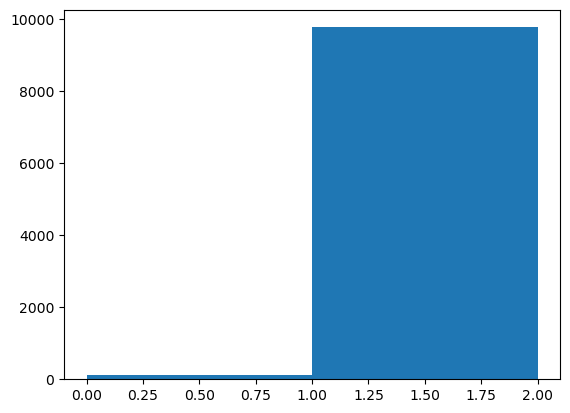

In [9]:
h=plt.hist(ak.values_astype(ak.flatten(t.LptElectron.conversionVeto),int),bins=[0,1,2])

In [10]:
h

(array([ 128., 9782.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

# mini iso

In [60]:
eles = ak.flatten(t.Electron[t.Electron.genMatched])
lpts = ak.flatten(t.LptElectron[t.LptElectron.genMatched])

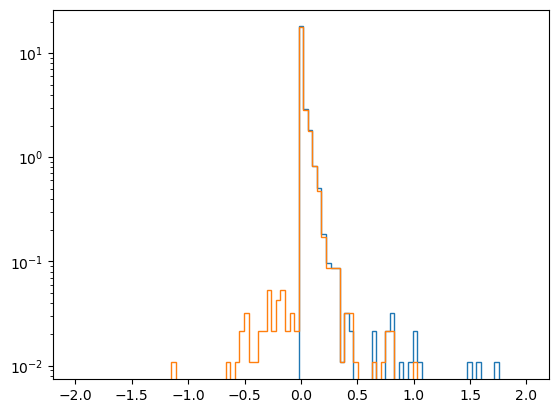

In [61]:
h1 = plt.hist(eles.miniRelIso,bins=np.linspace(-2,2,100),histtype='step',density=True)
h1 = plt.hist(eles.miniRelIsoEleCorr,bins=np.linspace(-2,2,100),histtype='step',density=True)
plt.yscale('log')

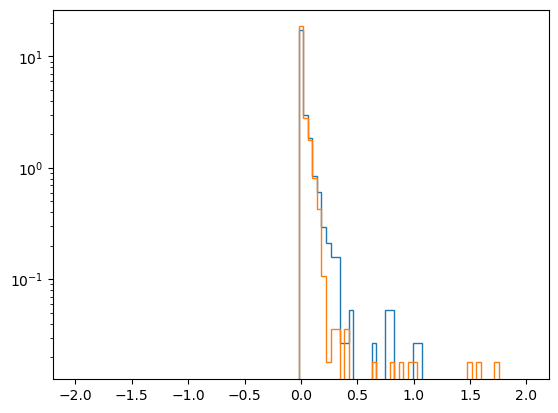

In [62]:
h1 = plt.hist(eles.miniRelIso[eles.isEE],bins=np.linspace(-2,2,100),histtype='step',density=True)
h1 = plt.hist(eles.miniRelIso[~eles.isEE],bins=np.linspace(-2,2,100),histtype='step',density=True)
plt.yscale('log')

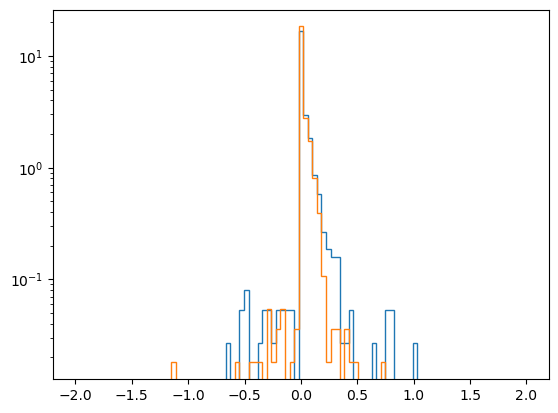

In [63]:
h1 = plt.hist(eles.miniRelIsoEleCorr[eles.isEE],bins=np.linspace(-2,2,100),histtype='step',density=True)
h1 = plt.hist(eles.miniRelIsoEleCorr[~eles.isEE],bins=np.linspace(-2,2,100),histtype='step',density=True)
plt.yscale('log')

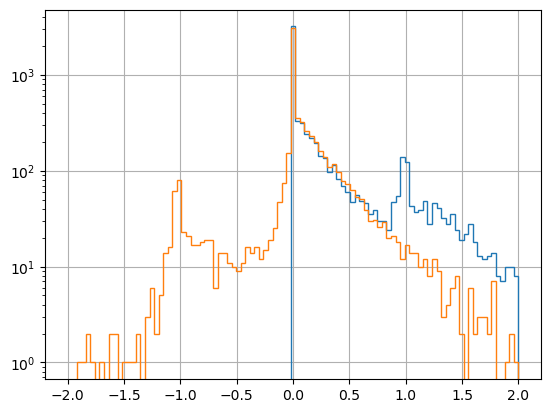

In [64]:
h1 = plt.hist(lpts.miniRelIso,bins=np.linspace(-2,2,100),histtype='step')
h1 = plt.hist(lpts.miniRelIsoEleCorr,bins=np.linspace(-2,2,100),histtype='step')
plt.yscale('log')
plt.grid()

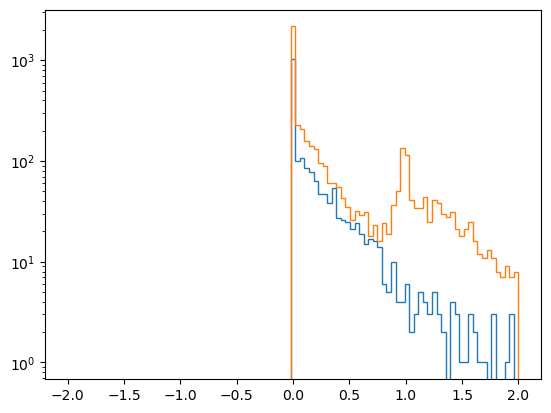

In [65]:
h1 = plt.hist(lpts.miniRelIso[lpts.isEE],bins=np.linspace(-2,2,100),histtype='step')
h1 = plt.hist(lpts.miniRelIso[~lpts.isEE],bins=np.linspace(-2,2,100),histtype='step')
plt.yscale('log')

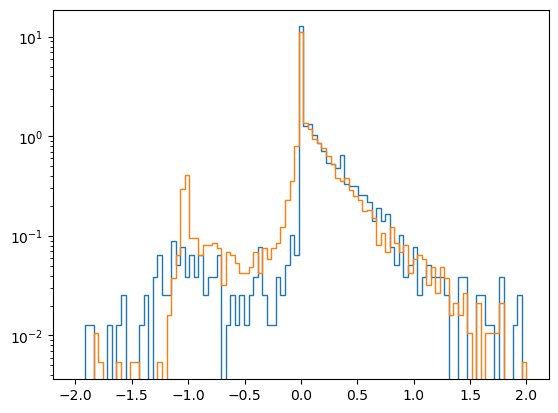

In [66]:
h1 = plt.hist(lpts.miniRelIsoEleCorr[lpts.isEE],bins=np.linspace(-2,2,100),histtype='step',density=True)
h1 = plt.hist(lpts.miniRelIsoEleCorr[~lpts.isEE],bins=np.linspace(-2,2,100),histtype='step',density=True)
plt.yscale('log')

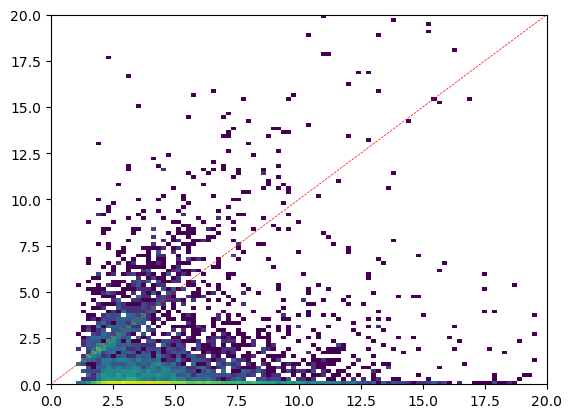

In [22]:
h=plt.hist2d(lpts.pt,lpts.miniIso,bins=np.linspace(0,20,100),norm=LogNorm())
plt.plot(np.linspace(0,20,200),np.linspace(0,20,200),color='red',linestyle='--',lw=0.5)

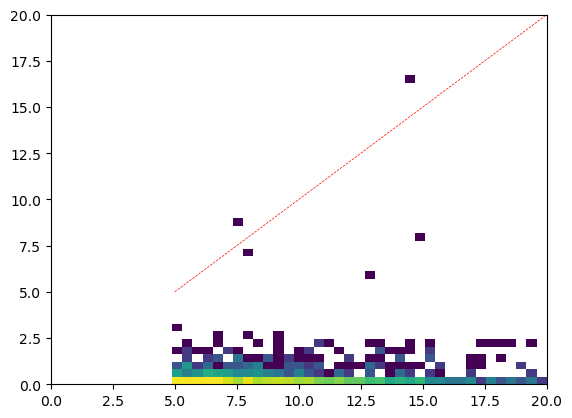

In [28]:
h=plt.hist2d(eles.pt,eles.miniIso,bins=np.linspace(0,20,50),norm=LogNorm())
plt.plot(np.linspace(5,20,200),np.linspace(5,20,200),color='red',linestyle='--',lw=0.5)

In [27]:
eles.miniRelIso

<Array [0.0883, 0, 0, 0, 0, ... 0.139, 0, 0, 0] type='1272 * float32[parameters=...'>

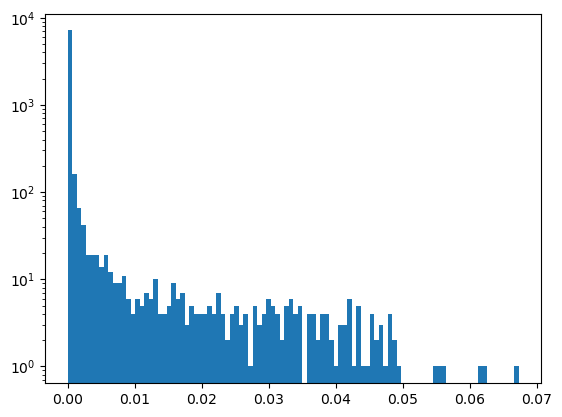

In [15]:
#h=plt.hist(ak.flatten(t.LptElectron[t.Electron[t.Electron.hasLptMatch].lptMatchIdx].pt - t.Electron[t.Electron.hasLptMatch].pt),bins=100)

eles = t.Electron[t.Electron.hasLptMatch]
lpts = t.LptElectron[t.Electron[t.Electron.hasLptMatch].lptMatchIdx]

dphi = routines.deltaPhi(eles.phi,lpts.phi)
deta = eles.eta-lpts.eta
dR = np.sqrt(dphi**2+deta**2)
h = plt.hist(ak.flatten(dR),bins=100)
plt.yscale('log')

In [17]:
ak.where(t.Electron.lptMatchIdx != -999,t.Electron.lptMatchIdx,0)

<Array [[], [0], [0, 0], ... [], [], [0], []] type='14455 * var * int64'>

In [6]:
import vector
tk1=ak.zip({"pt":t.Conversion.tk1_pt,"eta":t.Conversion.tk1_eta,"phi":t.Conversion.tk1_phi})
tk2=ak.zip({"pt":t.Conversion.tk2_pt,"eta":t.Conversion.tk2_eta,"phi":t.Conversion.tk2_phi})
e = ak.zip({"pt":t.GenEle.pt,"eta":t.GenEle.eta,"phi":t.GenEle.phi})
p = ak.zip({"pt":t.GenPos.pt,"eta":t.GenPos.eta,"phi":t.GenPos.phi})

In [43]:
dR1e = np.sqrt((tk1.eta-e.eta)**2 + routines.deltaPhi(tk1.phi,e.phi)**2)
dR1p = np.sqrt((tk1.eta-p.eta)**2 + routines.deltaPhi(tk1.phi,p.phi)**2)

dR2e = np.sqrt((tk2.eta-e.eta)**2 + routines.deltaPhi(tk2.phi,e.phi)**2)
dR2p = np.sqrt((tk2.eta-p.eta)**2 + routines.deltaPhi(tk2.phi,p.phi)**2)

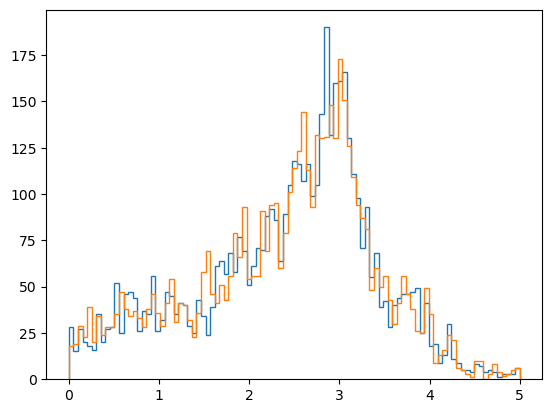

In [51]:
noEmatch = ~t.GenEle.matched
h=plt.hist(ak.flatten(dR1e[noEmatch]),bins=np.linspace(0,5,100),histtype='step',label='dR1e')
h=plt.hist(ak.flatten(dR2e[noEmatch]),bins=np.linspace(0,5,100),histtype='step',label='dR2e')

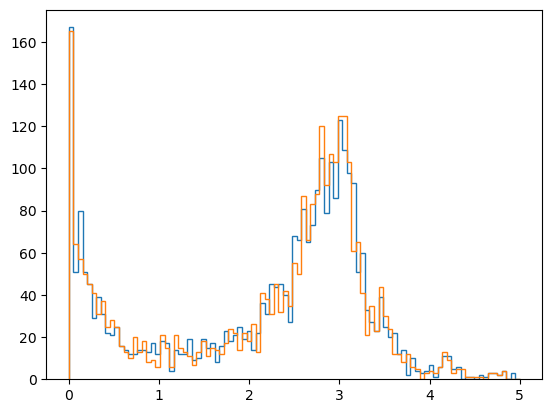

In [53]:
Ematch = t.GenEle.matched
h=plt.hist(ak.flatten(dR1e[Ematch]),bins=np.linspace(0,5,100),histtype='step',label='dR1e')
h=plt.hist(ak.flatten(dR2e[Ematch]),bins=np.linspace(0,5,100),histtype='step',label='dR2e')

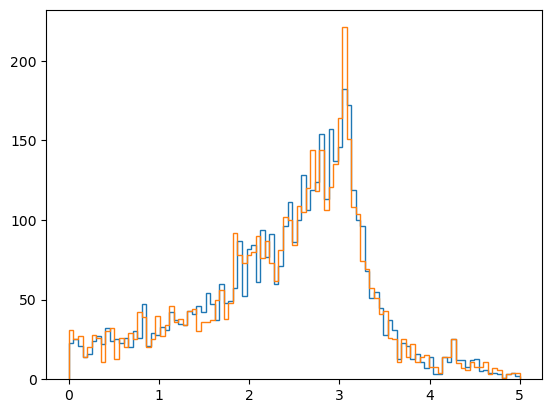

In [52]:
noPmatch = ~t.GenPos.matched
h=plt.hist(ak.flatten(dR1p[noPmatch]),bins=np.linspace(0,5,100),histtype='step',label='dR1e')
h=plt.hist(ak.flatten(dR2p[noPmatch]),bins=np.linspace(0,5,100),histtype='step',label='dR2e')

In [109]:
dR1e = ak.min(np.sqrt((tk1.eta-e.eta)**2 + routines.deltaPhi(tk1.phi,e.phi)**2),axis=1)
dR1p = ak.min(np.sqrt((tk1.eta-p.eta)**2 + routines.deltaPhi(tk1.phi,p.phi)**2),axis=1)

dR2e = ak.min(np.sqrt((tk2.eta-e.eta)**2 + routines.deltaPhi(tk2.phi,e.phi)**2),axis=1)
dR2p = ak.min(np.sqrt((tk2.eta-p.eta)**2 + routines.deltaPhi(tk2.phi,p.phi)**2),axis=1)

nearestE = np.minimum(dR1e,dR2e)
nearestP = np.minimum(dR1p,dR2p)

In [110]:
e1p1 = t.GenEle.matched & t.GenPos.matched & (ak.count(t.Conversion.pt,axis=1)>0)
e1p0 = t.GenEle.matched & ~t.GenPos.matched & (ak.count(t.Conversion.pt,axis=1)>0)
e0p1 = ~t.GenEle.matched & t.GenPos.matched & (ak.count(t.Conversion.pt,axis=1)>0)
e0p0 = ~t.GenEle.matched & ~t.GenPos.matched & (ak.count(t.Conversion.pt,axis=1)>0)

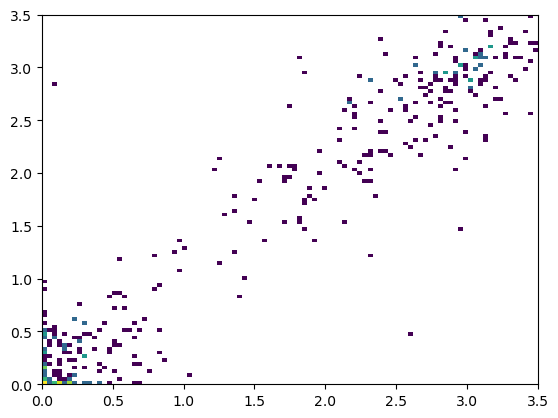

In [89]:
from matplotlib.colors import Normalize, LogNorm
h=plt.hist2d(dR1e[e1p1],dR1p[e1p1],bins=np.linspace(0,3.5,100),norm=LogNorm())

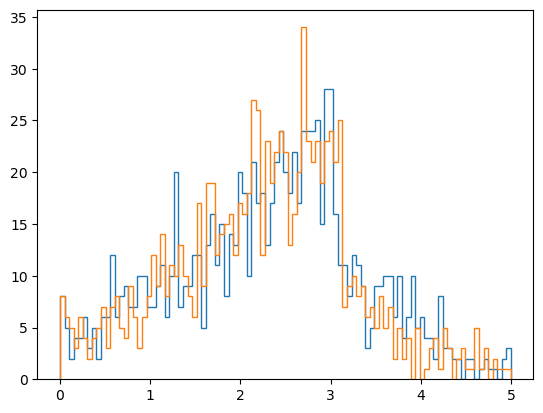

In [129]:
h=plt.hist(nearestE[e0p0],bins=np.linspace(0,5,100),histtype='step')
h=plt.hist(nearestP[e0p0],bins=np.linspace(0,5,100),histtype='step')

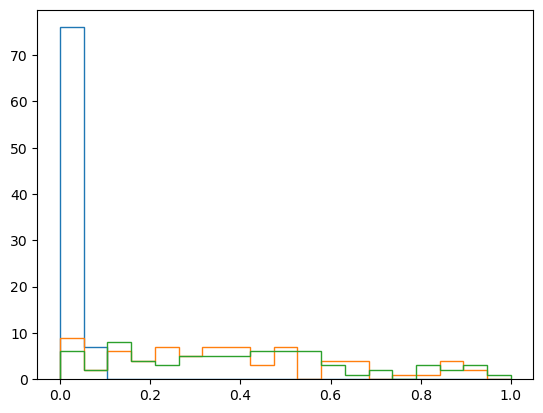

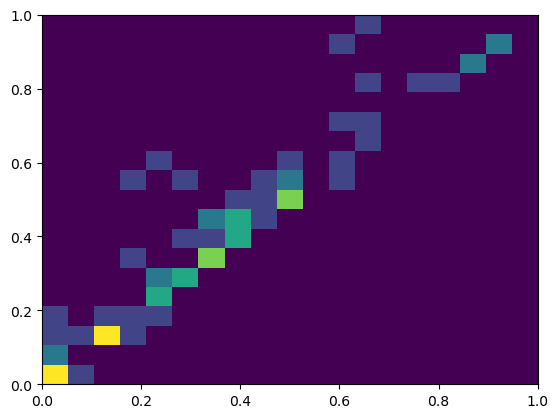

In [148]:
cut = nearestE[e1p0]<0.1
plt.figure()
h=plt.hist(nearestE[e1p0][cut],bins=np.linspace(0,1,20),histtype='step')
h=plt.hist(nearestP[e1p0][cut],bins=np.linspace(0,1,20),histtype='step')
h=plt.hist(t.genEE.dr[e1p0][cut],bins=np.linspace(0,1,20),histtype='step')
plt.figure()
h=plt.hist2d(nearestP[e1p0][cut],t.genEE.dr[e1p0][cut],bins=np.linspace(0,1,20))

In [149]:
ak.count_nonzero(e1p0)

462

In [150]:
ak.count_nonzero(nearestE[e1p0]<0.1)

83

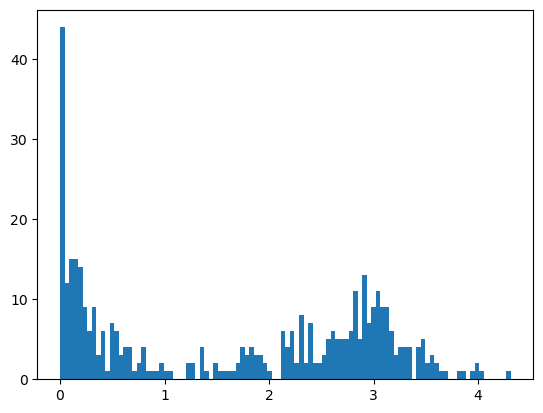

In [106]:
h=plt.hist(dR1e[e1p1],bins=100)

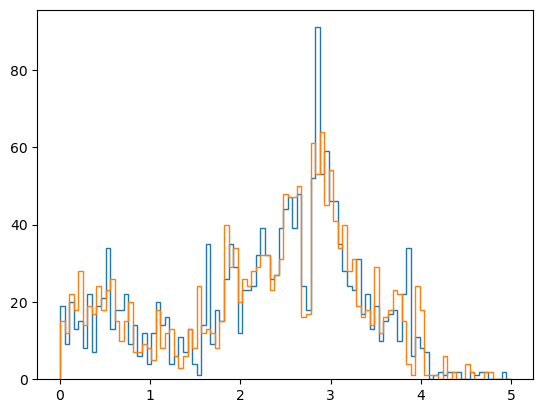

In [63]:
h=plt.hist(ak.flatten(dR1e[e0p1]),bins=np.linspace(0,5,100),histtype='step',label='dR1e')
h=plt.hist(ak.flatten(dR2e[e0p1]),bins=np.linspace(0,5,100),histtype='step',label='dR2e')

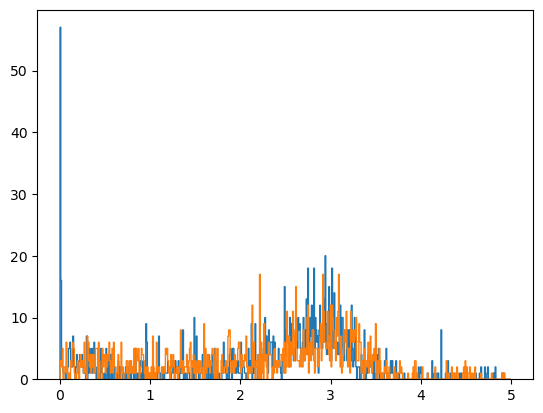

In [70]:
h=plt.hist(ak.flatten(dR1e[e1p0]),bins=np.linspace(0,5,600),histtype='step',label='dR1e')
h=plt.hist(ak.flatten(dR1p[e1p0]),bins=np.linspace(0,5,600),histtype='step',label='dR1e')
#h=plt.hist(ak.flatten(dR2e[e1p0]),bins=np.linspace(0,5,600),histtype='step',label='dR2e')

In [ ]:
h=plt.hist2d(ak.min(dR1e[e1p0],axis=1),bins=np.linspace(0,5,600),histtype='step',label='dR1e')
#h=plt.hist(ak.flatten(dR2e[e1p0]),bins=np.linspace(0,5,600),histtype='step',label='dR2e')

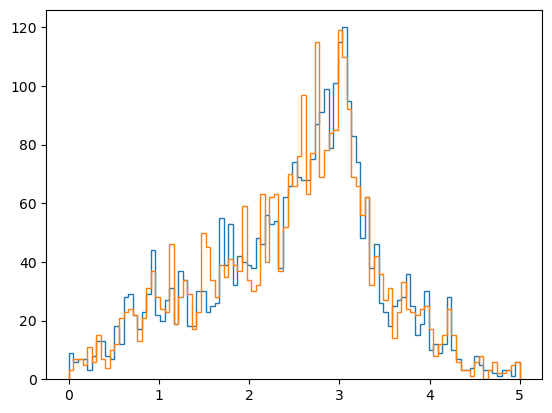

In [66]:
h=plt.hist(ak.flatten(dR1e[e0p0]),bins=np.linspace(0,5,100),histtype='step',label='dR1e')
h=plt.hist(ak.flatten(dR2e[e0p0]),bins=np.linspace(0,5,100),histtype='step',label='dR2e')

# sanity check plots

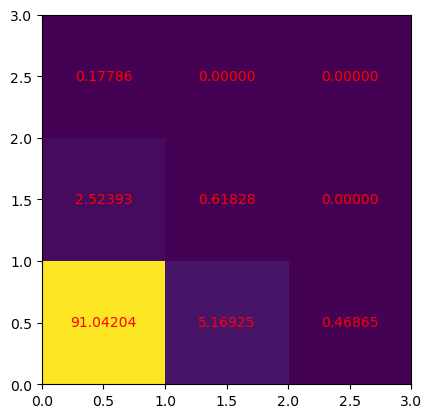

In [5]:
n_eMatch = ak.count_nonzero(t.Electron.genMatched,axis=1)
n_leMatch = ak.count_nonzero(t.LptElectron.genMatched,axis=1)

hist, xedges, yedges = np.histogram2d(n_eMatch,n_leMatch,bins=np.arange(4))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
for i in range(len(xedges) - 1):
    for j in range(len(yedges) - 1):
        plt.text((xedges[i] + xedges[i+1]) / 2, (yedges[j] + yedges[j+1]) / 2, 
                 f"{100*hist[i, j]/np.sum(hist):.5f}", ha='center', va='center', color='red')

{0, 1, 2}


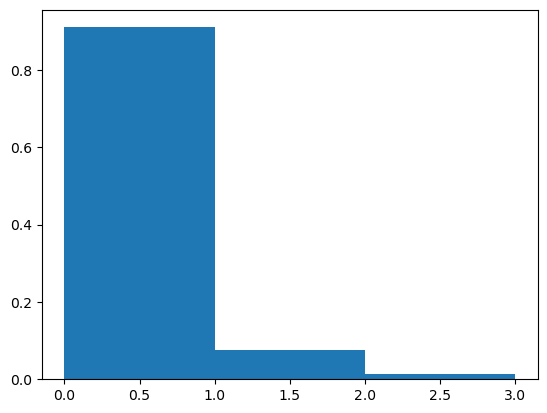

In [6]:
print(set(n_eMatch + n_leMatch))
h=plt.hist(n_eMatch+n_leMatch,bins=np.arange(4),density=True)

# Gen-matched electrons

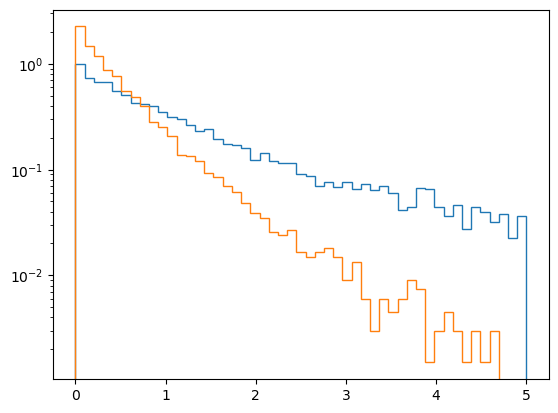

In [4]:
h1 = plt.hist(ak.flatten(t.Electron.PFRelIso[~t.Electron.genMatched]),bins=np.linspace(0,5,50),histtype='step',density=True)
h2 = plt.hist(ak.flatten(t.Electron.PFRelIso[t.Electron.genMatched]),bins=np.linspace(0,5,50),histtype='step',density=True)
plt.yscale('log')

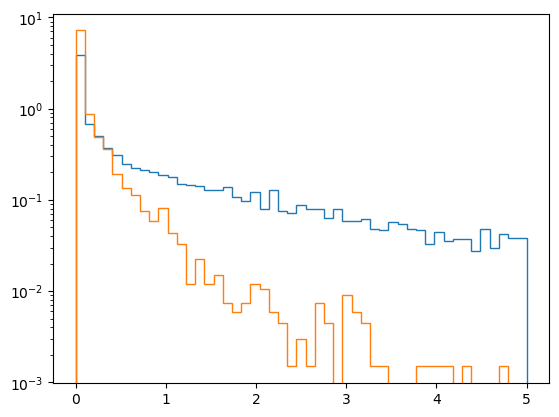

In [5]:
h1 = plt.hist(ak.flatten(t.Electron.miniRelIso[~t.Electron.genMatched]),bins=np.linspace(0,5,50),histtype='step',density=True)
h2 = plt.hist(ak.flatten(t.Electron.miniRelIso[t.Electron.genMatched]),bins=np.linspace(0,5,50),histtype='step',density=True)
plt.yscale('log')

In [7]:
genE_matchL = (t.GenEle.matched) & (t.GenEle.matchType == 'L')
genE_matchR = (t.GenEle.matched) & (t.GenEle.matchType == 'R')
genE_matchedL = t.GenEle[genE_matchL]
genE_matchedR = t.GenEle[genE_matchR]
recoE_matchedL = t.LptElectron[genE_matchL][ak.from_iter(genE_matchedL.matchIdxLocal[:,np.newaxis])][:,0]
recoE_matchedR = t.Electron[genE_matchR][ak.from_iter(genE_matchedR.matchIdxLocal[:,np.newaxis])][:,0]

genP_matchL = (t.GenPos.matched) & (t.GenPos.matchType == 'L')
genP_matchR = (t.GenPos.matched) & (t.GenPos.matchType == 'R')
genP_matchedL = t.GenPos[genP_matchL]
genP_matchedR = t.GenPos[genP_matchR]
recoP_matchedL = t.LptElectron[genP_matchL][ak.from_iter(genP_matchedL.matchIdxLocal[:,np.newaxis])][:,0]
recoP_matchedR = t.Electron[genP_matchR][ak.from_iter(genP_matchedR.matchIdxLocal[:,np.newaxis])][:,0]

In [8]:
gen_matchedL = ak.concatenate([genE_matchedL,genP_matchedL],axis=0)
reco_matchedL = ak.concatenate([recoE_matchedL,recoP_matchedL],axis=0)

gen_matchedR = ak.concatenate([genE_matchedR,genP_matchedR],axis=0)
reco_matchedR = ak.concatenate([recoE_matchedR,recoP_matchedR],axis=0)

In [6]:
bins = np.linspace(0,30,50)
h = plt.hist(gen_matchedR.pt,bins=bins,label='matched to reg',histtype='step',density=True)
h2 = plt.hist(gen_matchedL.pt,bins=bins,label='matched to lpt',histtype='step',density=True)
plt.legend()
#plt.yscale('log')
plt.xlabel('gen pT')

NameError: name 'gen_matchedR' is not defined

Text(0.5, 0, '$(p_T^\\mathrm{gen} - p_T^\\mathrm{reco})/p_T^\\mathrm{gen}$')

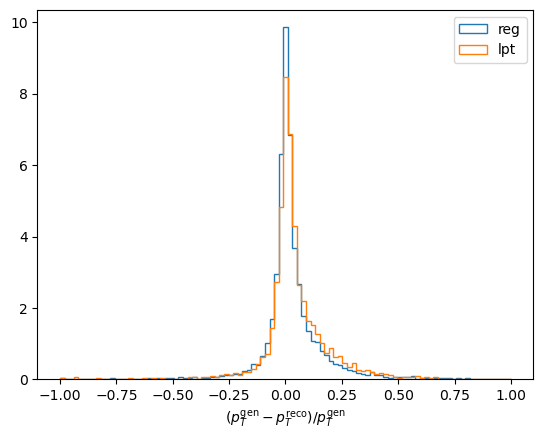

In [7]:
bins = np.linspace(-1,1,100)
h1 = plt.hist((gen_matchedR.pt - reco_matchedR.pt)/gen_matchedR.pt,bins=bins,histtype='step',label='reg',density=True)
h2 = plt.hist((gen_matchedL.pt - reco_matchedL.pt)/gen_matchedL.pt,bins=bins,histtype='step',label='lpt',density=True)
plt.legend()
#plt.yscale('log')
plt.xlabel(r"$(p_T^\mathrm{gen} - p_T^\mathrm{reco})/p_T^\mathrm{gen}$")

Text(0.5, 0, 'Gen vxy')

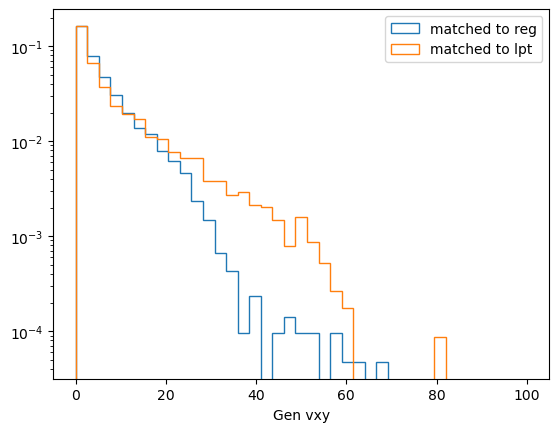

In [8]:
bins = np.linspace(0,100,40)
h = plt.hist(gen_matchedR.vxy,bins=bins,label='matched to reg',histtype='step',density=True)
h2 = plt.hist(gen_matchedL.vxy,bins=bins,label='matched to lpt',histtype='step',density=True)
plt.legend()
plt.yscale('log')
plt.xlabel("Gen vxy")

Text(0.5, 0, 'Reco pT')

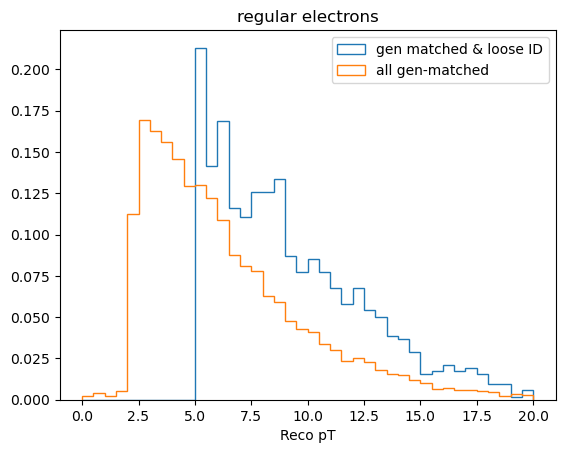

In [9]:
# pt spectrum for regular electrons passing/failing loose cut-based ID
bins = np.arange(0,20.5,0.5)
h = plt.hist(reco_matchedR.pt[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.pt,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
#plt.yscale('log')
plt.xlabel("Reco pT")

Text(0.5, 0, 'sieie')

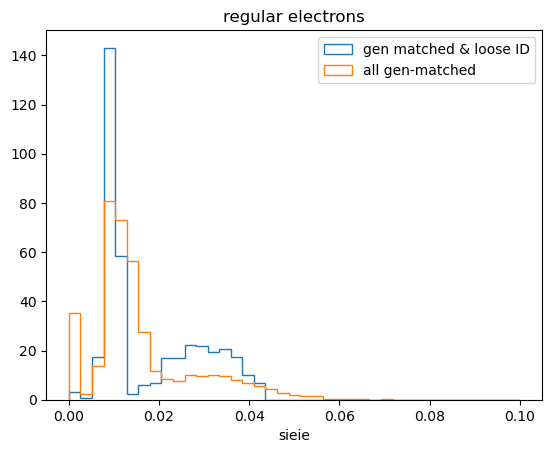

In [11]:
# sieie spectrum for regular electrons passing/failing loose cut-based ID
bins = np.linspace(0,0.1,40)
h = plt.hist(reco_matchedR.full55sigmaIetaIeta[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.full55sigmaIetaIeta,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
#plt.yscale('log')
plt.xlabel("sieie")

Text(0.5, 0, 'absdEtaSeed')

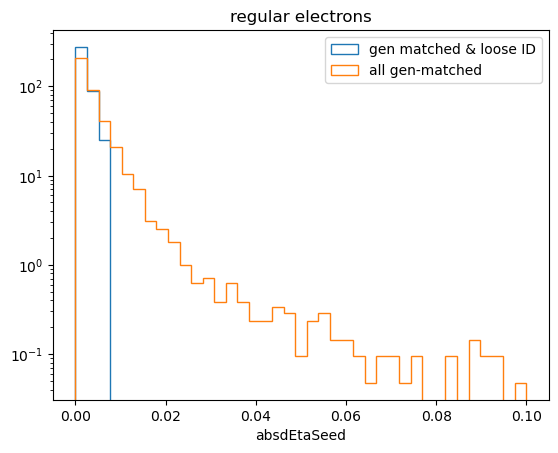

In [14]:
# absdEtaSeed spectrum for regular electrons passing/failing loose cut-based ID
bins = np.linspace(0,0.1,40)
h = plt.hist(reco_matchedR.absdEtaSeed[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.absdEtaSeed,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
plt.yscale('log')
plt.xlabel("absdEtaSeed")

Text(0.5, 0, 'absdPhiIn')

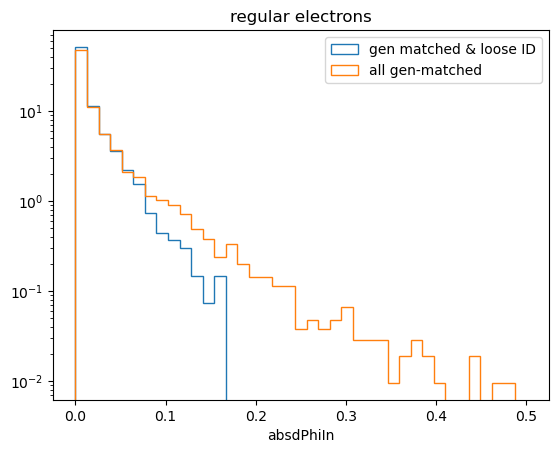

In [17]:
# absdPhiIn spectrum for regular electrons passing/failing loose cut-based ID
bins = np.linspace(0,0.5,40)
h = plt.hist(reco_matchedR.absdPhiIn[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.absdPhiIn,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
plt.yscale('log')
plt.xlabel("absdPhiIn")

Text(0.5, 0, 'HoverE')

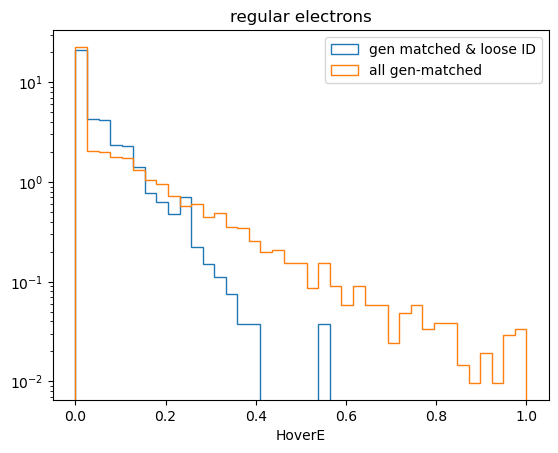

In [20]:
# HoverE spectrum for regular electrons passing/failing loose cut-based ID
bins = np.linspace(0,1,40)
h = plt.hist(reco_matchedR.HoverE[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.HoverE,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
plt.yscale('log')
plt.xlabel("HoverE")

Text(0.5, 0, 'abs1overEm1overP')

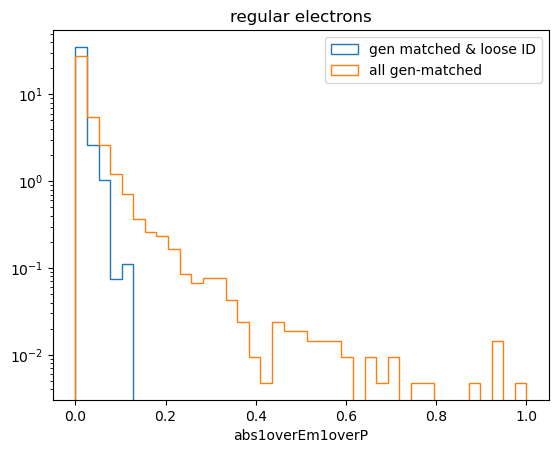

In [21]:
# abs1overEm1overP spectrum for regular electrons passing/failing loose cut-based ID
bins = np.linspace(0,1,40)
h = plt.hist(reco_matchedR.abs1overEm1overP[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.abs1overEm1overP,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
plt.yscale('log')
plt.xlabel("abs1overEm1overP")

Text(0.5, 0, 'expMissingInnerHits')

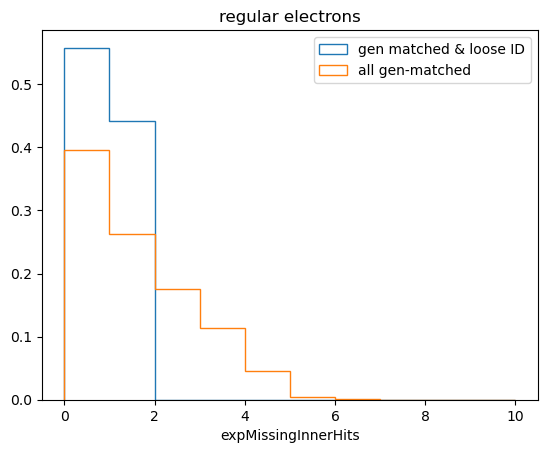

In [23]:
# expMissingInnerHits spectrum for regular electrons passing/failing loose cut-based ID
bins = np.arange(11)
h = plt.hist(reco_matchedR.expMissingInnerHits[reco_matchedR.IDcutLoose==1],bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(reco_matchedR.expMissingInnerHits,bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
#plt.yscale('log')
plt.xlabel("expMissingInnerHits")

Text(0.5, 0, 'conversionVeto')

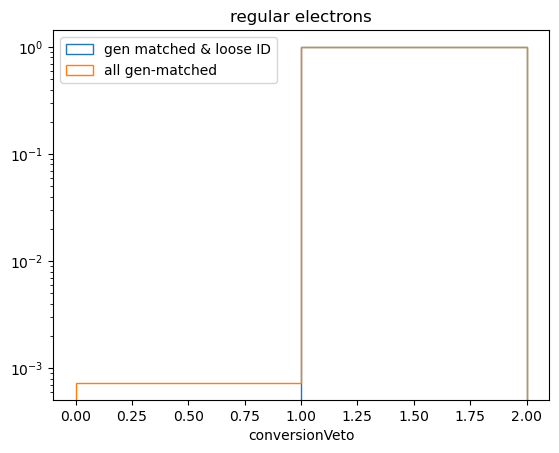

In [32]:
# conversionVeto spectrum for regular electrons passing/failing loose cut-based ID
bins = np.arange(3)
h = plt.hist(ak.values_astype(reco_matchedR.conversionVeto[reco_matchedR.IDcutLoose==1],int),bins=bins,label='gen matched & loose ID',histtype='step',density=True)
h2 = plt.hist(ak.values_astype(reco_matchedR.conversionVeto,int),bins=bins,label='all gen-matched',histtype='step',density=True)
plt.title("regular electrons")
plt.legend()
plt.yscale('log')
plt.xlabel("conversionVeto")

In [26]:
reco_matchedR.conversionVeto.astype

AttributeError: no field named 'astype'

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.3/src/awkward/highlevel.py#L1124)

In [28]:
reco_matchedR.fields

['pt',
 'eta',
 'etaErr',
 'phi',
 'phiErr',
 'IDcutVeto',
 'IDcutLoose',
 'IDcutMed',
 'IDcutTight',
 'IDmvaIso90',
 'IDmvaIso80',
 'IDmvaIsoLoose',
 'IDmva90',
 'IDmva80',
 'IDmvaLoose',
 'angRes',
 'e',
 'vxy',
 'vz',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'trkChi2',
 'trkIso',
 'trkRelIso',
 'calIso',
 'calRelIso',
 'PFIso4',
 'PFRelIso4',
 'PFIso3',
 'PFRelIso3',
 'PFIso8',
 'PFRelIso8',
 'PFIso',
 'PFRelIso',
 'miniIso',
 'miniRelIso',
 'chadIso',
 'nhadIso',
 'phoIso',
 'rhoEA',
 'trkProb',
 'numTrackerHits',
 'numPixHits',
 'numStripHits',
 'charge',
 'isPF',
 'genMatched',
 'matchType',
 'dRJets',
 'dPhiJets',
 'full55sigmaIetaIeta',
 'absdEtaSeed',
 'absdPhiIn',
 'HoverE',
 'abs1overEm1overP',
 'expMissingInnerHits',
 'conversionVeto']

# Vertices

In [17]:
all_eles = ak.concatenate((t.Electron,t.LptElectron),axis=1)
n_reg = ak.count(t.Electron.pt,axis=1)

isLow1 = ak.values_astype(t.vtx.e1_typ=="L","int")
isLow2 = ak.values_astype(t.vtx.e2_typ=="L","int")

vtx_e1_flatIdx = t.vtx.e1_idx + isLow1*n_reg
vtx_e2_flatIdx = t.vtx.e2_idx + isLow2*n_reg

t["vtx","e1"] = all_eles[vtx_e1_flatIdx]
t["vtx","e2"] = all_eles[vtx_e2_flatIdx]

In [22]:
match_evts = ak.any(t.vtx.isMatched,axis=1)
match_vtx = ak.flatten(t.vtx[t.vtx.isMatched])

In [23]:
set(match_vtx.matchSign)

{-1}

(array([[   0.,    0., 2117.],
        [   0.,    0.,    0.],
        [2162.,    0.,    0.]]),
 array([-1,  0,  1,  2]),
 array([-1,  0,  1,  2]),
 <matplotlib.collections.QuadMesh at 0x7f99563cb940>)

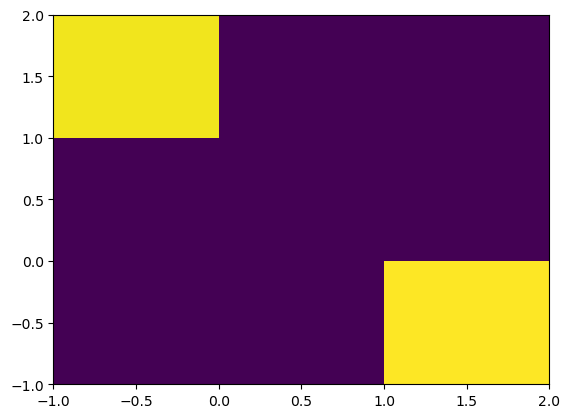

In [25]:
cut = np.abs(match_vtx.METdPhi) >= 0
plt.hist2d(match_vtx.e1.matchType[cut],match_vtx.e2.matchType[cut],bins=np.arange(-1,3))
#plt.colorbar()

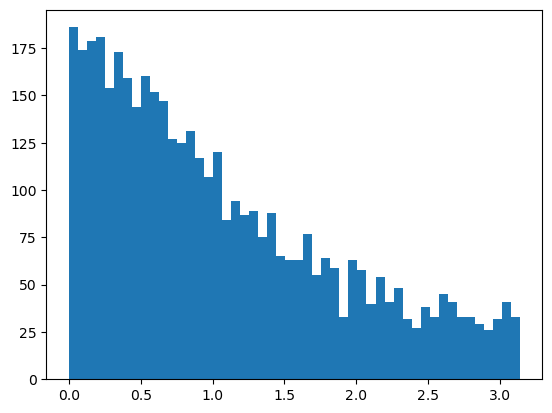

In [27]:
h=plt.hist(np.abs(match_vtx.METdPhi),bins=50)

In [29]:
from analysisTools import deltaPhi
dphi_gen = deltaPhi(t.PFMET.phi,t.GenMET.phi)
match_dphi_gen = dphi_gen[match_evts]

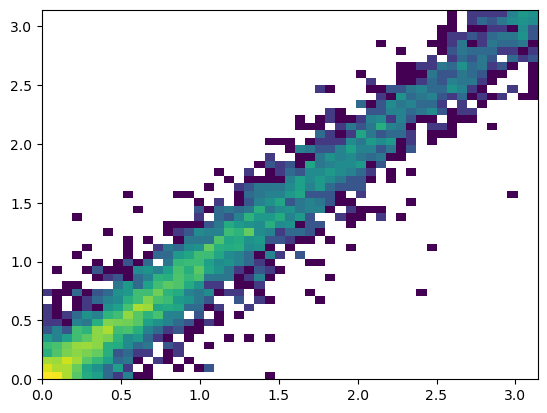

In [31]:
h=plt.hist2d(np.abs(match_vtx.METdPhi),np.abs(t.genEE.METdPhi[match_evts]),bins=np.linspace(0,np.pi,50),norm=LogNorm())

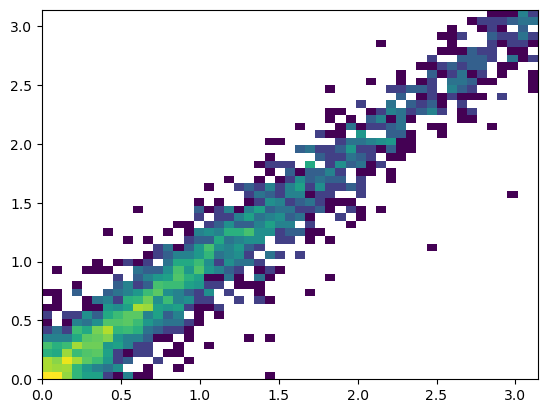

In [32]:
cut=match_vtx.typ=='RR'
h=plt.hist2d(np.abs(match_vtx.METdPhi[cut]),np.abs(t.genEE.METdPhi[match_evts][cut]),
             bins=np.linspace(0,np.pi,50),norm=LogNorm())

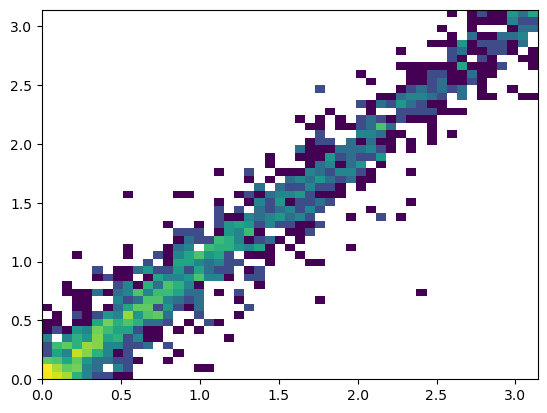

In [33]:
cut=match_vtx.typ=='LR'
h=plt.hist2d(np.abs(match_vtx.METdPhi[cut]),np.abs(t.genEE.METdPhi[match_evts][cut]),
             bins=np.linspace(0,np.pi,50),norm=LogNorm())

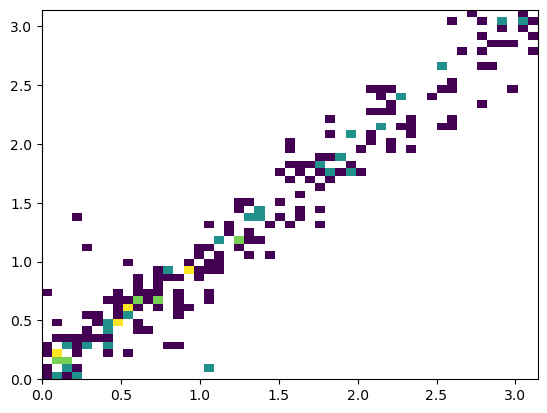

In [34]:
cut=match_vtx.typ=='LL'
h=plt.hist2d(np.abs(match_vtx.METdPhi[cut]),np.abs(t.genEE.METdPhi[match_evts][cut]),
             bins=np.linspace(0,np.pi,50),norm=LogNorm())